Compare performance of 10 CNNs pre-trained on ImageNet dataset using images of 20 classes of CIFAR-100 dataset.
Students need to submit individual hand-written report via CR on 25.5.2025 (Sunday) before CSE4261 class.
Code + digital report should be submitted to the Assignment box by scheduled time.
Students may compare models based on accuracy, hardware requirements, size of the model, inference time, architecture etc.

In [42]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


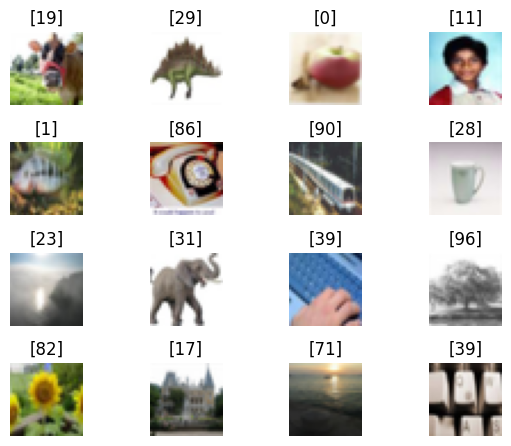

In [43]:
(trainX, trainY), (testX, testY) = cifar100.load_data(label_mode='fine')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(trainX[i])
  plt.title(trainY[i])
  plt.tight_layout()
  plt.axis('off')
plt.show()

## Select first 20 class from 100 class

(10000, 32, 32, 3)
(10000,)
(2000, 32, 32, 3)
(2000,)


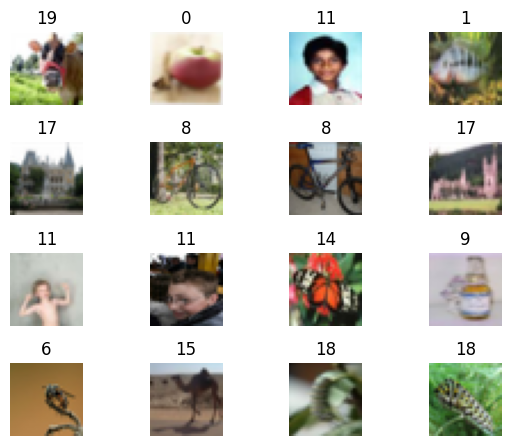

In [44]:

# Flatten labels
trainY = trainY.flatten()
testY = testY.flatten()

# Select first 20 odd indices
selected_indices = list(range(20))

# Create boolean masks
train_mask = np.isin(trainY, selected_indices)
test_mask = np.isin(testY, selected_indices)

# Filter data
trainX= trainX[train_mask]
trainY= trainY[train_mask]
testX= testX[test_mask]
testY= testY[test_mask]

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(trainX[i])
  plt.title(trainY[i])
  plt.tight_layout()
  plt.axis('off')
plt.show()

In [45]:

def resize_images(images, size=(224, 224)):
    resized_images = []
    for img in images:
        resized = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized)
    return np.array(resized_images)


In [46]:
trainX_resized = resize_images(trainX)
testX_resized = resize_images(testX)

# Preprocess input for VGG16
trainX_preprocessed = preprocess_input(trainX_resized)
testX_preprocessed = preprocess_input(testX_resized)


print("Resized and preprocessed images for the model.")

print(trainX_preprocessed.shape)
print(testX_preprocessed.shape)

Resized and preprocessed images for the model.
(10000, 224, 224, 3)
(2000, 224, 224, 3)


## Load VGG16 model

In [47]:
from tensorflow.keras.applications import VGG16


# Load VGG16 base model
vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

vgg16_base_model.trainable = False

inputs = vgg16_base_model.inputs
x = vgg16_base_model.output
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='VGG16')
model.summary(show_trainable=True)

Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_11 (InputLayer) │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_11 (Flatten)        │ (None, 25088)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_33 (Dense)            │ (None, 64)            │  1,605,696 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_34 (Dense)            │ (None, 32)            │      2,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_35 (Dense)            │ (None, 20)            │        660 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 16,323,124 (62.27 MB)

 Trainable params: 1,608,436 (6.14 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Compile and evaluate the VGG16 model

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg16_history= model.evaluate(testX_preprocessed, testY)

c:\Users\Md Mominur Rahman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_2865']. Received: the structure of inputs=*
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 468s 7s/step - accuracy: 0.0602 - loss: 7.5847


Total parameters: 7584136
Trainable parameters: 3314420
Non-trainable parameters: 4269716


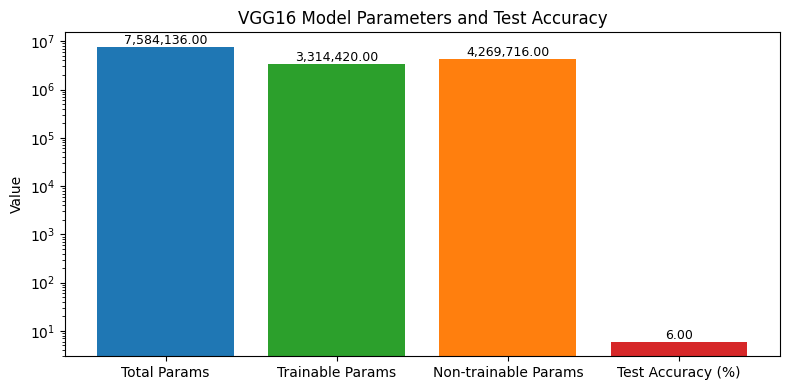

In [80]:
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')

test_accuracy = vgg16_history[1] * 100

# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, values, color=colors)

plt.yscale('log')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)

plt.title('VGG16 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()

plt.show()


## Load VGG19 (Pretrained on ImageNet)

In [50]:
from tensorflow.keras.applications import VGG19

vgg19_base = VGG19(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
vgg19_base.trainable = False
inputs=vgg19_base.input
# Add classification layers
x = Flatten()(vgg19_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)

model = Model(inputs, outputs, name='VGG19')
model.summary(show_trainable=True)


Model: "VGG19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_12 (InputLayer) │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv4 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv4 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv4 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_12 (Flatten)        │ (None, 25088)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_36 (Dense)            │ (None, 64)            │  1,605,696 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_37 (Dense)            │ (None, 32)            │      2,080 │   Y 

 Total params: 21,632,820 (82.52 MB)

 Trainable params: 1,608,436 (6.14 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

### VGG19 with 20 class output layer model summary

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg19_history= model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 684s 11s/step - accuracy: 0.0490 - loss: 9.6481


Total parameters: 21632820
Trainable parameters: 1608436
Non-trainable parameters: 20024384


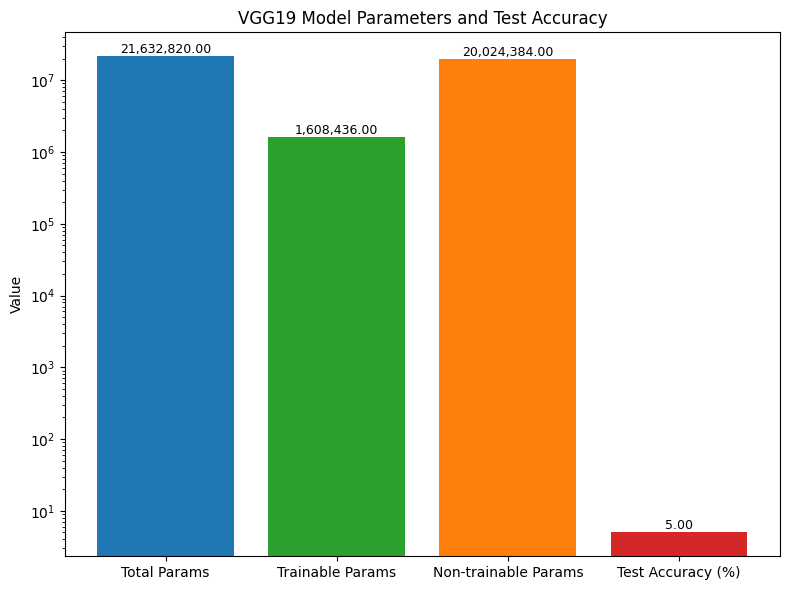

In [52]:
test_accuracy = vgg19_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')

# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('VGG19 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

## Load ResNet50 pretrained Model

In [53]:
from tensorflow.keras.applications import ResNet50

resnet50_base = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
resnet50_base.trainable = False
inputs=resnet50_base.input
# Add classification layers
x = Flatten()(resnet50_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)

model = Model(inputs, outputs, name='ResNet50')
model.summary(show_trainable=True)


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_13    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_pad         │ (None, 230,     │         0 │ input_layer_1… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,472 │ conv1_pad[0][… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_bn          │ (None, 112,     │       256 │ conv1_conv[0]… │   N   │
│ (BatchNormalizat… │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_relu        │ (None, 112,     │         0 │ conv1_bn[0][0] │   -   │
│ (Activation)      │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pad         │ (None, 114,     │         0 │ conv1_relu[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1_pool        │ (None, 56, 56,  │         0 │ pool1_pad[0][… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     4,160 │ pool1_pool[0]… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,928 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_bn │ (None, 56, 56,  │       256 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_c… │ (None, 56, 56,  │    16,640 │ pool1_pool[0]… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_3_c… │ (None, 56, 56,  │    16,640 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_bn │ (None, 56, 56,  │     1,024 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 256)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_3_bn │ (None, 56, 56,  │     1,024 │ conv2_block1_… │   N 

 Total params: 30,013,044 (114.49 MB)

 Trainable params: 6,425,332 (24.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Compile and evaluate the resnet50

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet50_history= model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.0558 - loss: 4.1381


Test accuracy: 5.05%
Total parameters: 30013044
Trainable parameters: 6425332
Non-trainable parameters: 23587712


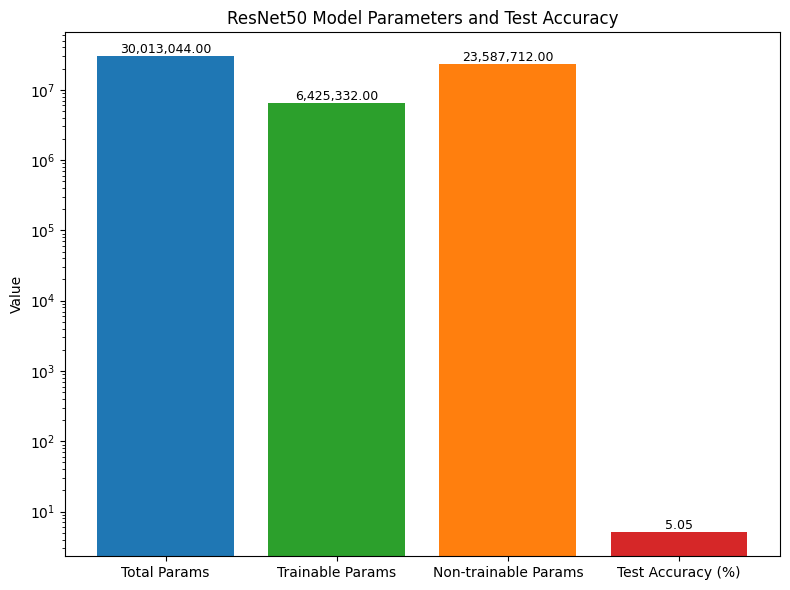

In [55]:
test_accuracy = resnet50_history[1] * 100
print(f'Test accuracy: {test_accuracy:.2f}%')
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('ResNet50 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

## Load Mobilenet pretrained Model

In [56]:
from tensorflow.keras.applications import MobileNet
mobilenet_base = MobileNet(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
mobilenet_base.trainable = False
inputs=mobilenet_base.input
# Add classification layers
x = Flatten()(mobilenet_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='MobileNet')
model.summary(show_trainable=True)


Model: "MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_14 (InputLayer) │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 112, 112, 32)  │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 112, 112, 32)  │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 112, 112, 32)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 112, 112, 32)  │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 112, 112, 32)  │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 112, 112, 32)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 112, 112, 64)  │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 112, 112, 64)  │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 113, 113, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 56, 56, 64)    │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 56, 56, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 56, 56, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 56, 56, 128)   │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 56, 56, 128)   │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 56, 56, 128)   │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 56, 56, 128)   │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 56, 56, 128)   │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 56, 56, 128)   │        512 │   N 

 Total params: 6,442,932 (24.58 MB)

 Trainable params: 3,214,068 (12.26 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mobilenet_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 783ms/step - accuracy: 0.0517 - loss: 3.8385


Total parameters: 6442932
Trainable parameters: 3214068
Non-trainable parameters: 3228864


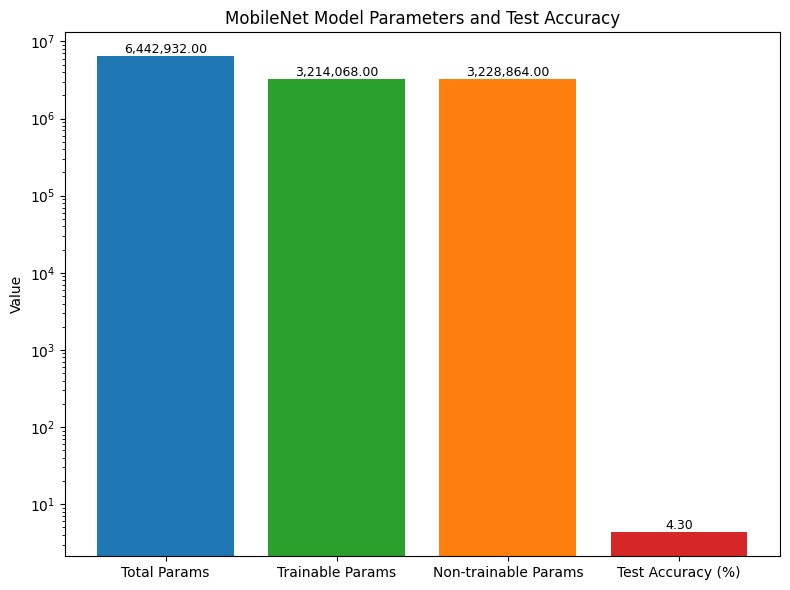

In [58]:
test_accuracy = mobilenet_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')

# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('MobileNet Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


## Load MobilenetV2

In [59]:
from tensorflow.keras.applications import MobileNetV2
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
mobilenetv2_base.trainable = False
inputs=mobilenetv2_base.input
# Add classification layers
x = Flatten()(mobilenetv2_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='MobileNetV2')
model.summary(show_trainable=True)

Model: "MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_15    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1 (Conv2D)    │ (None, 112,     │       864 │ input_layer_1… │   N   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bn_Conv1          │ (None, 112,     │       128 │ Conv1[0][0]    │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1_relu (ReLU) │ (None, 112,     │         0 │ bn_Conv1[0][0] │   -   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       288 │ Conv1_relu[0]… │   N   │
│ (DepthwiseConv2D) │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       128 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │         0 │ expanded_conv… │   -   │
│ (ReLU)            │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │       512 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │        64 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand    │ (None, 112,     │     1,536 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_BN │ (None, 112,     │       384 │ block_1_expan… │   N   │
│ (BatchNormalizat… │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_r… │ (None, 112,     │         0 │ block_1_expan… │   -   │
│ (ReLU)            │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_pad       │ (None, 113,     │         0 │ block_1_expan… │   -   │
│ (ZeroPadding2D)   │ 113, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwise │ (None, 56, 56,  │       864 │ block_1_pad[0… │   N   │
│ (DepthwiseConv2D) │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │       384 │ block_1_depth… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │         0 │ block_1_depth… │   -   │
│ (ReLU)            │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_project   │ (None, 56, 56,  │     2,304 │ block_1_depth… │   N 

 Total params: 6,274,868 (23.94 MB)

 Trainable params: 4,016,884 (15.32 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## compile and evaluate MobilenetV2

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mobilenetv2_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 926ms/step - accuracy: 0.0437 - loss: 3.4808


Test accuracy: 4.30%
Total parameters: 6274868
Trainable parameters: 4016884
Non-trainable parameters: 2257984


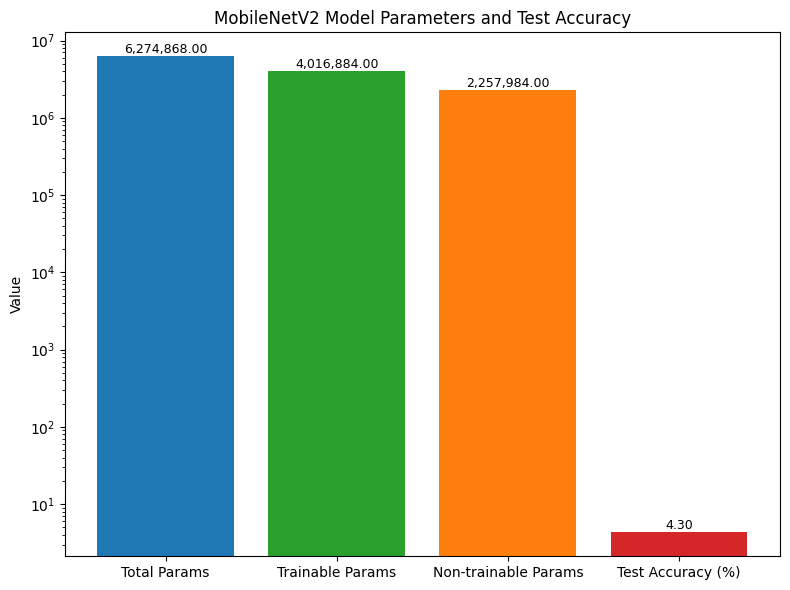

In [61]:
test_accuracy = mobilenet_history[1] * 100
print(f'Test accuracy: {test_accuracy:.2f}%')
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('MobileNetV2 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


## Load DenseNet121

In [62]:
from tensorflow.keras.applications import DenseNet121
densenet121_base = DenseNet121(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
densenet121_base.trainable = False
inputs=densenet121_base.input
# Add classification layers
x = Flatten()(densenet121_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='DenseNet121')
model.summary(show_trainable=True)

Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_16    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d_8  │ (None, 230,     │         0 │ input_layer_1… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,408 │ zero_padding2… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_bn          │ (None, 112,     │       256 │ conv1_conv[0]… │   N   │
│ (BatchNormalizat… │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_relu        │ (None, 112,     │         0 │ conv1_bn[0][0] │   -   │
│ (Activation)      │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d_9  │ (None, 114,     │         0 │ conv1_relu[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1             │ (None, 56, 56,  │         0 │ zero_padding2… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_bn │ (None, 56, 56,  │       256 │ pool1[0][0]    │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     8,192 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       512 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,864 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_con… │ (None, 56, 56,  │         0 │ pool1[0][0],   │   -   │
│ (Concatenate)     │ 96)             │           │ conv2_block1_… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_bn │ (None, 56, 56,  │       384 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_r… │ (None, 56, 56,  │         0 │ conv2_block2_… │   -   │
│ (Activation)      │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_1_c… │ (None, 56, 56,  │    12,288 │ conv2_block2_… │   N 

 Total params: 10,251,572 (39.11 MB)

 Trainable params: 3,214,068 (12.26 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

## Compile and evaluate DenseNet121

In [63]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
DenseNet121_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.0543 - loss: 9.6247


Total parameters: 10251572
Trainable parameters: 3214068
Non-trainable parameters: 7037504


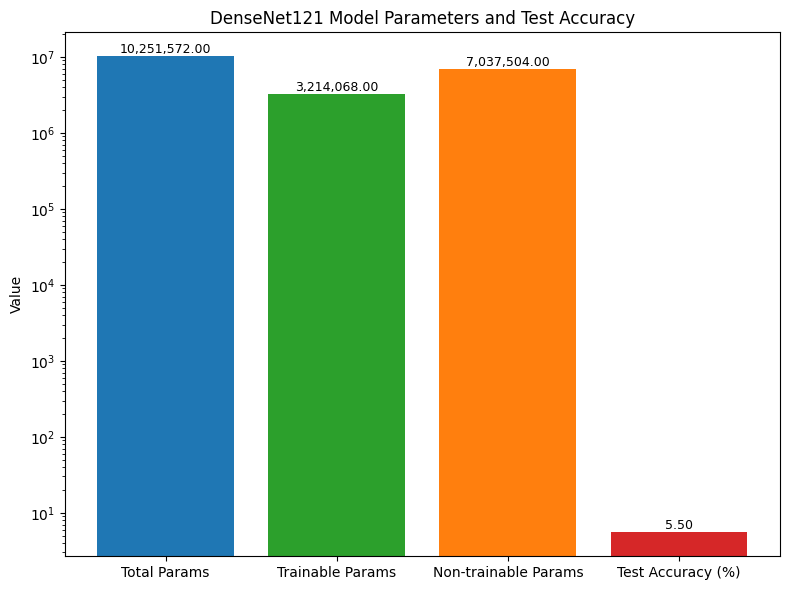

In [64]:
test_accuracy = DenseNet121_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
# Prepare data for plotting
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('DenseNet121 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

## load DenseNet201 pretrained Model

In [65]:
from tensorflow.keras.applications import DenseNet201
densenet201_base = DenseNet201(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
densenet201_base.trainable = False
inputs=densenet201_base.input
# Add classification layers
x = Flatten()(densenet201_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='DenseNet201')
model.summary(show_trainable=True)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_17    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d_10 │ (None, 230,     │         0 │ input_layer_1… │   -   │
│ (ZeroPadding2D)   │ 230, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_conv        │ (None, 112,     │     9,408 │ zero_padding2… │   N   │
│ (Conv2D)          │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_bn          │ (None, 112,     │       256 │ conv1_conv[0]… │   N   │
│ (BatchNormalizat… │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv1_relu        │ (None, 112,     │         0 │ conv1_bn[0][0] │   -   │
│ (Activation)      │ 112, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ zero_padding2d_11 │ (None, 114,     │         0 │ conv1_relu[0]… │   -   │
│ (ZeroPadding2D)   │ 114, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ pool1             │ (None, 56, 56,  │         0 │ zero_padding2… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_bn │ (None, 56, 56,  │       256 │ pool1[0][0]    │   N   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_0_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_c… │ (None, 56, 56,  │     8,192 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_bn │ (None, 56, 56,  │       512 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_1_r… │ (None, 56, 56,  │         0 │ conv2_block1_… │   -   │
│ (Activation)      │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_2_c… │ (None, 56, 56,  │    36,864 │ conv2_block1_… │   N   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block1_con… │ (None, 56, 56,  │         0 │ pool1[0][0],   │   -   │
│ (Concatenate)     │ 96)             │           │ conv2_block1_… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_bn │ (None, 56, 56,  │       384 │ conv2_block1_… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_0_r… │ (None, 56, 56,  │         0 │ conv2_block2_… │   -   │
│ (Activation)      │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2_block2_1_c… │ (None, 56, 56,  │    12,288 │ conv2_block2_… │   N 

 Total params: 24,345,908 (92.87 MB)

 Trainable params: 6,023,924 (22.98 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

### Compile and evaluate Densenet201

In [66]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
DenseNet201_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 356s 5s/step - accuracy: 0.0477 - loss: 8.3910


Total parameters: 24345908
Trainable parameters: 6023924
Non-trainable parameters: 18321984


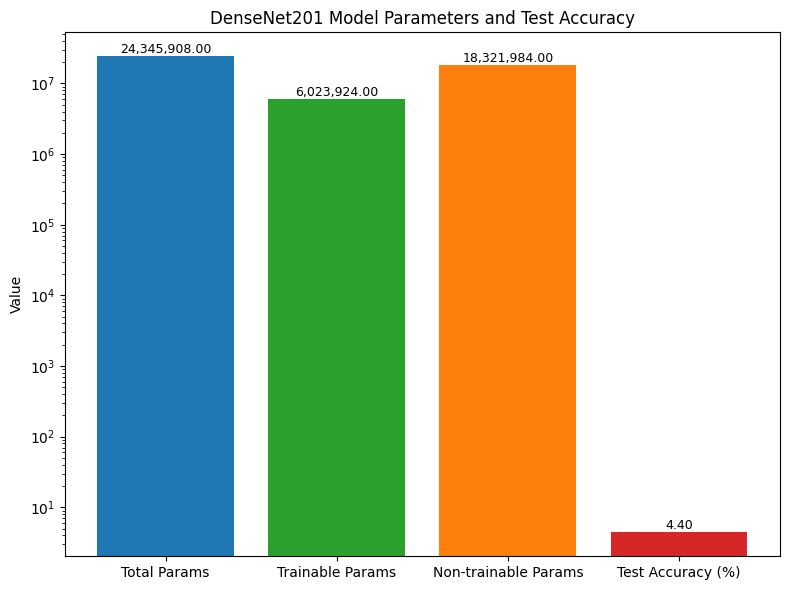

In [67]:
test_accuracy = DenseNet201_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('DenseNet201 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


### Load InceptionNetV3 pretrained mode

In [68]:
from tensorflow.keras.applications import InceptionV3
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
inceptionv3_base.trainable = False
inputs=inceptionv3_base.input
# Add classification layers
x = Flatten()(inceptionv3_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='InceptionV3')
model.summary(show_trainable=True)


Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_18    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_98         │ (None, 111,     │       864 │ input_layer_1… │   N   │
│ (Conv2D)          │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 111,     │        96 │ conv2d_98[0][… │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_282    │ (None, 111,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_99         │ (None, 109,     │     9,216 │ activation_28… │   N   │
│ (Conv2D)          │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 109,     │        96 │ conv2d_99[0][… │   N   │
│ (BatchNormalizat… │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_283    │ (None, 109,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 109, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_100        │ (None, 109,     │    18,432 │ activation_28… │   N   │
│ (Conv2D)          │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 109,     │       192 │ conv2d_100[0]… │   N   │
│ (BatchNormalizat… │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_284    │ (None, 109,     │         0 │ batch_normali… │   -   │
│ (Activation)      │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ max_pooling2d_4   │ (None, 54, 54,  │         0 │ activation_28… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_101        │ (None, 54, 54,  │     5,120 │ max_pooling2d… │   N   │
│ (Conv2D)          │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 54, 54,  │       240 │ conv2d_101[0]… │   N   │
│ (BatchNormalizat… │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_285    │ (None, 54, 54,  │         0 │ batch_normali… │   -   │
│ (Activation)      │ 80)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_102        │ (None, 52, 52,  │   138,240 │ activation_28… │   N   │
│ (Conv2D)          │ 192)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 52, 52,  │       576 │ conv2d_102[0]… │   N   │
│ (BatchNormalizat… │ 192)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_286    │ (None, 52, 52,  │         0 │ batch_normali… │   - 

 Total params: 25,082,388 (95.68 MB)

 Trainable params: 3,279,604 (12.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### Compile and evalute the model

In [69]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
inceptionv3_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.0516 - loss: 38.1822


Total parameters: 25082388
Trainable parameters: 3279604
Non-trainable parameters: 21802784


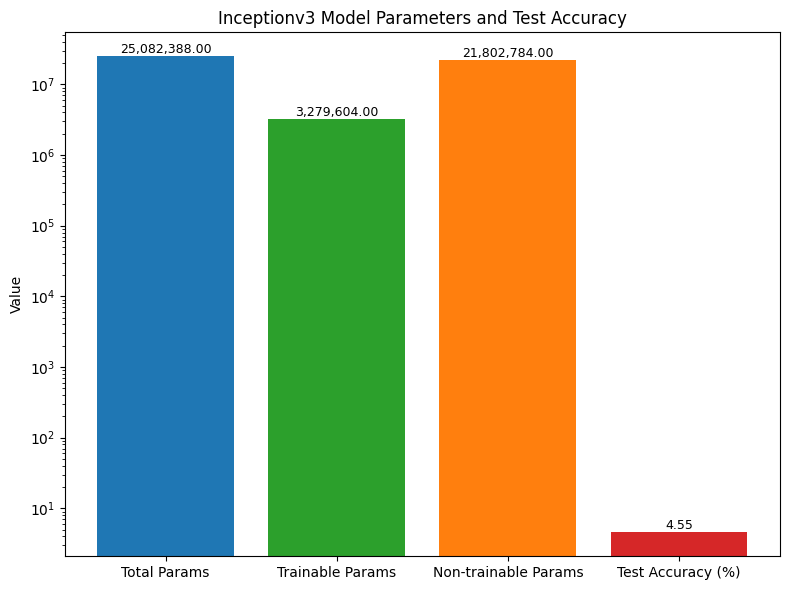

In [70]:
test_accuracy = inceptionv3_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('Inceptionv3 Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [71]:
from tensorflow.keras.applications import Xception
xception_base = Xception(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
xception_base.trainable = False
inputs=xception_base.input
# Add classification layers
x = Flatten()(xception_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='Xception')
model.summary(show_trainable=True)

Model: "Xception"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_19    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1      │ (None, 111,     │       864 │ input_layer_1… │   N   │
│ (Conv2D)          │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1_bn   │ (None, 111,     │       128 │ block1_conv1[… │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv1_act  │ (None, 111,     │         0 │ block1_conv1_… │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2      │ (None, 109,     │    18,432 │ block1_conv1_… │   N   │
│ (Conv2D)          │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2_bn   │ (None, 109,     │       256 │ block1_conv2[… │   N   │
│ (BatchNormalizat… │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block1_conv2_act  │ (None, 109,     │         0 │ block1_conv2_… │   -   │
│ (Activation)      │ 109, 64)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv1   │ (None, 109,     │     8,768 │ block1_conv2_… │   N   │
│ (SeparableConv2D) │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv1_… │ (None, 109,     │       512 │ block2_sepcon… │   N   │
│ (BatchNormalizat… │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2_… │ (None, 109,     │         0 │ block2_sepcon… │   -   │
│ (Activation)      │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2   │ (None, 109,     │    17,536 │ block2_sepcon… │   N   │
│ (SeparableConv2D) │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_sepconv2_… │ (None, 109,     │       512 │ block2_sepcon… │   N   │
│ (BatchNormalizat… │ 109, 128)       │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ conv2d_192        │ (None, 55, 55,  │     8,192 │ block1_conv2_… │   N   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block2_pool       │ (None, 55, 55,  │         0 │ block2_sepcon… │   -   │
│ (MaxPooling2D)    │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ batch_normalizat… │ (None, 55, 55,  │       512 │ conv2d_192[0]… │   N   │
│ (BatchNormalizat… │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ add_16 (Add)      │ (None, 55, 55,  │         0 │ block2_pool[0… │   -   │
│                   │ 128)            │           │ batch_normali… │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block3_sepconv1_… │ (None, 55, 55,  │         0 │ add_16[0][0]   │   - 

 Total params: 27,286,812 (104.09 MB)

 Trainable params: 6,425,332 (24.51 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
xception_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.0308 - loss: 10.9840


Total parameters: 7584136
Trainable parameters: 3314420
Non-trainable parameters: 4269716


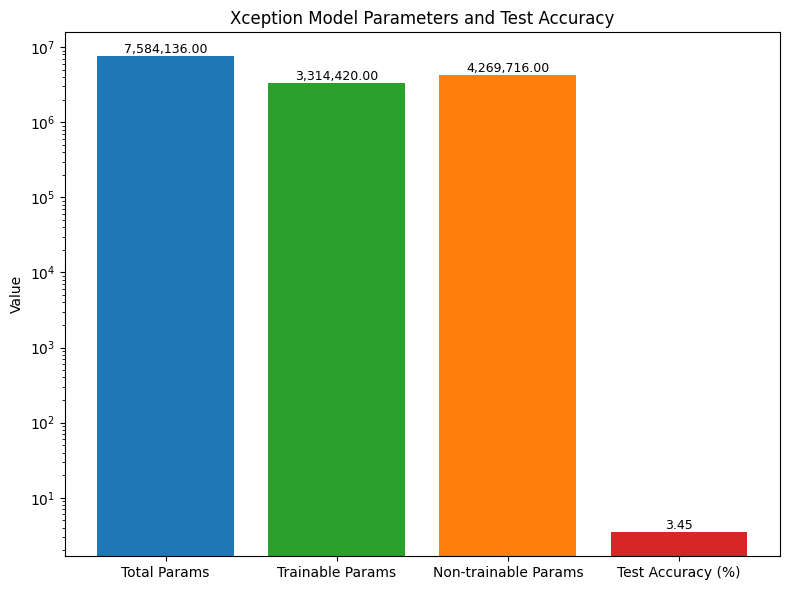

In [81]:
test_accuracy = xception_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('Xception Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### Load NASnetMobile model

In [74]:
from tensorflow.keras.applications import  NASNetMobile
nasnet_base = NASNetMobile(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
nasnet_base.trainable = False
inputs=nasnet_base.input
# Add classification layers
x = Flatten()(nasnet_base.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(20, activation='softmax')(x)
model = Model(inputs, outputs, name='NASNetMobile')
model.summary(show_trainable=True)

Model: "NASNetMobile"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_20    │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_conv1        │ (None, 111,     │       864 │ input_layer_2… │   N   │
│ (Conv2D)          │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ stem_bn1          │ (None, 111,     │       128 │ stem_conv1[0]… │   N   │
│ (BatchNormalizat… │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_376    │ (None, 111,     │         0 │ stem_bn1[0][0] │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ reduction_conv_1… │ (None, 111,     │       352 │ activation_37… │   N   │
│ (Conv2D)          │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ reduction_bn_1_s… │ (None, 111,     │        44 │ reduction_con… │   N   │
│ (BatchNormalizat… │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_377    │ (None, 111,     │         0 │ reduction_bn_… │   -   │
│ (Activation)      │ 111, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_379    │ (None, 111,     │         0 │ stem_bn1[0][0] │   -   │
│ (Activation)      │ 111, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 115,     │         0 │ activation_37… │   -   │
│ (ZeroPadding2D)   │ 115, 11)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 117,     │         0 │ activation_37… │   -   │
│ (ZeroPadding2D)   │ 117, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │       396 │ separable_con… │   N   │
│ (SeparableConv2D) │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │     1,920 │ separable_con… │   N   │
│ (SeparableConv2D) │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │        44 │ separable_con… │   N   │
│ (BatchNormalizat… │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_1… │ (None, 56, 56,  │        44 │ separable_con… │   N   │
│ (BatchNormalizat… │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_378    │ (None, 56, 56,  │         0 │ separable_con… │   -   │
│ (Activation)      │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ activation_380    │ (None, 56, 56,  │         0 │ separable_con… │   -   │
│ (Activation)      │ 11)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ separable_conv_2… │ (None, 56, 56,  │       396 │ activation_37… │   N 

 Total params: 7,584,136 (28.93 MB)

 Trainable params: 3,314,420 (12.64 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

### Evaluate the model

In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nasnet_history = model.evaluate(testX_preprocessed, testY)

63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.0499 - loss: 13.5435


Total parameters: 7584136
Trainable parameters: 3314420
Non-trainable parameters: 4269716


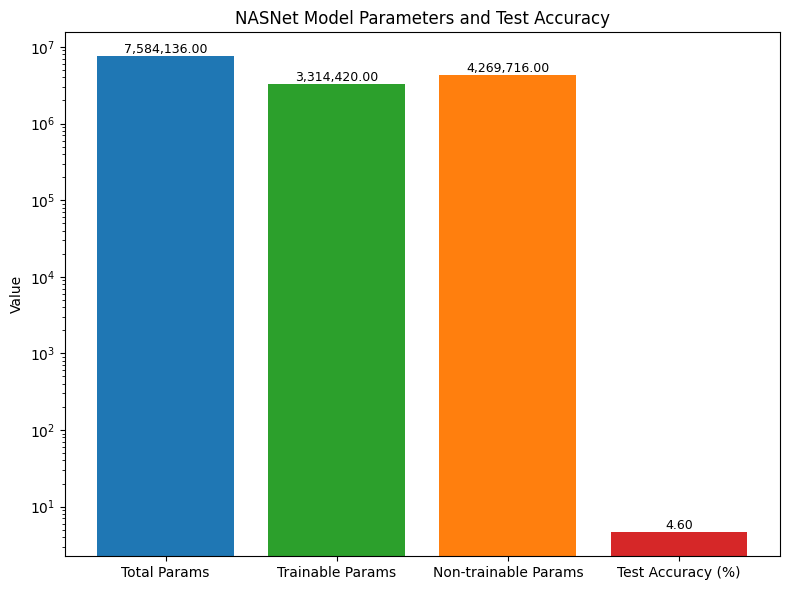

In [76]:
test_accuracy = nasnet_history[1] * 100
total_params = model.count_params()
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
non_trainable_params = total_params - trainable_params
print(f'Total parameters: {total_params}')
print(f'Trainable parameters: {trainable_params}')
print(f'Non-trainable parameters: {non_trainable_params}')
labels = ['Total Params', 'Trainable Params', 'Non-trainable Params', 'Test Accuracy (%)']
values = [total_params, trainable_params, non_trainable_params, test_accuracy]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.yscale('log')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=9)
plt.title('NASNet Model Parameters and Test Accuracy')
plt.ylabel('Value')
plt.tight_layout()
plt.show()